In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [9]:
root = 'data/'

In [10]:
raw_data = pd.read_csv(root + 'DataCoSupplyChainDataset.csv', encoding='latin1')

In [11]:
raw_data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [13]:
sum(raw_data.duplicated())

0

In [15]:
raw_data.keys()

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [16]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [17]:
raw_data.describe()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [18]:
raw_data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


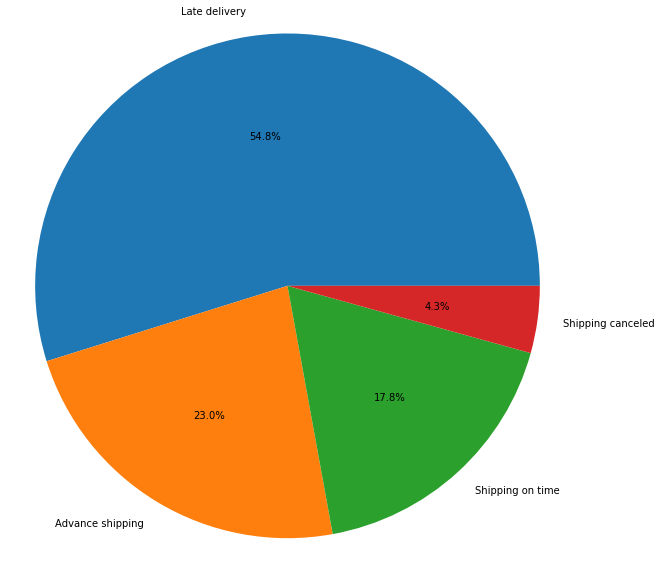

In [19]:
plt.figure(figsize = (10,10))
# Đếm số lần xuất hiện của từng giá trị trong cột 'Hạng mục'
value_counts = raw_data['Delivery Status'].value_counts()

# Vẽ pie chart
#plt.title("Delivery Status")
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('figs/delivery status percentage.png')

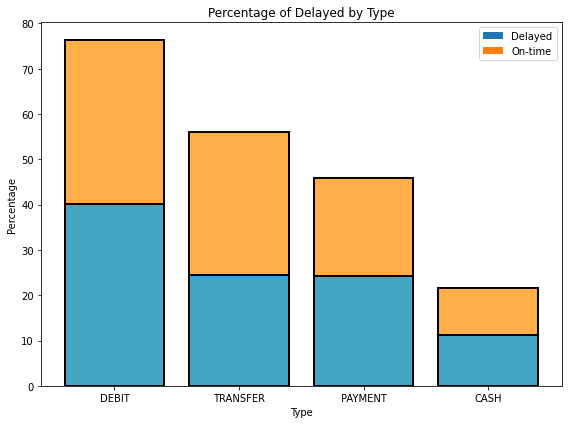

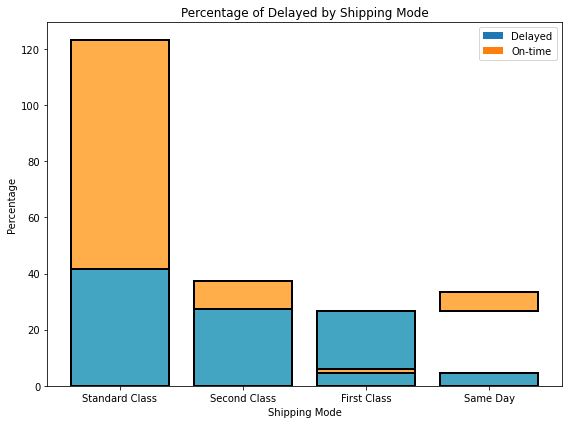

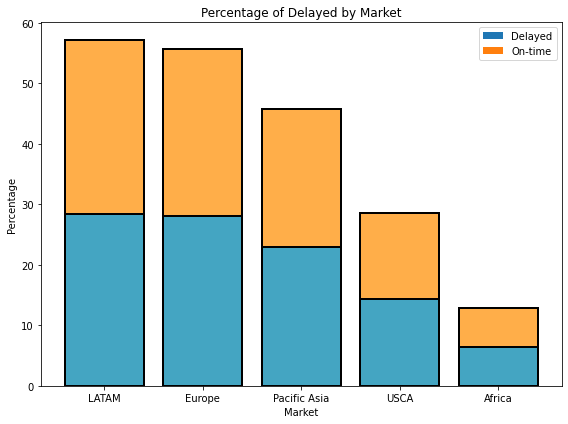

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
df =raw_data

# Tính tỉ lệ trễ/không trễ theo từng biến
delay_counts = df.groupby('Type')['Late_delivery_risk'].value_counts(normalize=True).mul(100)
shipping_counts = df.groupby('Shipping Mode')['Late_delivery_risk'].value_counts(normalize=True).mul(100)
market_counts = df.groupby('Market')['Late_delivery_risk'].value_counts(normalize=True).mul(100)

def plot_percentage(value):
    # Tính tỉ lệ trễ/không trễ theo từng loại
    delay_counts = df[df['Late_delivery_risk'] == 1][value].value_counts(normalize=True).mul(100)
    ontime_counts = df[df['Late_delivery_risk'] == 0][value].value_counts(normalize=True).mul(100)
    
    # Vẽ biểu đồ stacked bar thể hiện phần trăm delay tương ứng với từng loại
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.bar(delay_counts.index, delay_counts, label='Delayed')
    ax.bar(ontime_counts.index, ontime_counts, bottom=delay_counts, label='On-time')
    ax.set_xlabel(value)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of Delayed by {v}')
    ax.legend()
    # Stacked bar chart
    ax.bar(delay_counts.index, delay_counts, color = "#44a5c2",
           edgecolor = "black", linewidth = 2)
    ax.bar(ontime_counts.index, ontime_counts, bottom = delay_counts, color = "#ffae49",
           edgecolor = "black", linewidth = 2)
    plt.tight_layout()
    plt.savefig(f'figs/Percentage of Delayed by {v}.png')
    plt.show()
for v in ['Type','Shipping Mode','Market']:
    plot_percentage(v)

<AxesSubplot:ylabel='Frequency'>

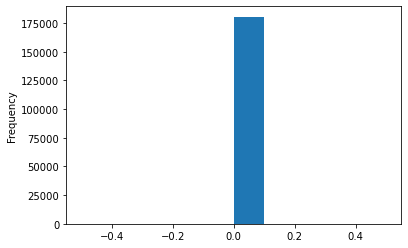

In [21]:
raw_data['Product Status'].plot.hist()
#chỉ chứa giá trị 0 trong product status    
    

In [22]:
# select features
data = raw_data[['Type','Benefit per order', 'Sales per customer','Latitude', 'Longitude', 'Market',\
        'order date (DateOrders)', 'Order Item Discount', 'Category Id',\
        'Order Item Discount Rate','Order Item Product Price', 'Order Item Profit Ratio',\
        'Order Item Quantity', 'Sales', 'Order Item Total','Shipping Mode', 'shipping date (DateOrders)',\
        'Order Profit Per Order','Product Category Id','Late_delivery_risk']]
# convert date time to day of week
data['order_weekday'] = data['order date (DateOrders)']
data['shipping_weekday'] = data['shipping date (DateOrders)']

data['order_weekday_datetime'] = pd.to_datetime(data['order_weekday'])#.dt.day_of_week
data['order_weekday'] = data['order_weekday_datetime'].dt.day_of_week
#data['order_day'] = data['order_weekday_datetime'].dt.date
data['shipping_weekday_datetime'] = pd.to_datetime(data['shipping_weekday'])#.dt.day_of_week
data['shipping_weekday'] = data['shipping_weekday_datetime'].dt.day_of_week
#data['shipping_day'] = data['shipping_weekday_datetime'].dt.date
tim_delta_list = list()
for i in range(len(data[['shipping_weekday_datetime']])):
    time_delta = (data['shipping_weekday_datetime'][i] - data['order_weekday_datetime'][i]).days
    tim_delta_list.append(time_delta)
data['time_delta'] = tim_delta_list
# numeric the string labels
data['market_int'] = pd.Categorical(data['Market']).codes
data['shipping_mode_int'] = pd.Categorical(data['Shipping Mode']).codes
data['type'] = pd.Categorical(data['Type']).codes

data = data.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)', 'shipping_weekday_datetime','order_weekday_datetime',\
                         'Shipping Mode', 'Market', 'Type'])

In [23]:
data.head()

,Benefit per order,Sales per customer,Latitude,Longitude,Order Item Discount,Category Id,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,...,Order Item Total,Order Profit Per Order,Product Category Id,Late_delivery_risk,order_weekday,shipping_weekday,time_delta,market_int,shipping_mode_int,type
0,91.250000,314.640015,18.251453,-66.037056,13.110000,73,0.04,327.75,0.29,1,...,314.640015,91.250000,73,0,2,5,3,3,3,1
1,-249.089996,311.359985,18.279451,-66.037064,16.389999,73,0.05,327.75,-0.80,1,...,311.359985,-249.089996,73,1,5,3,5,3,3,3
2,-247.779999,309.720001,37.292233,-121.881279,18.030001,73,0.06,327.75,-0.80,1,...,309.720001,-247.779999,73,0,5,2,4,3,3,0
3,22.860001,304.809998,34.125946,-118.291016,22.940001,73,0.07,327.75,0.08,1,...,304.809998,22.860001,73,0,5,1,3,3,3,1
4,134.210007,298.250000,18.253769,-66.037048,29.500000,73,0.09,327.75,0.45,1,...,298.250000,134.210007,73,0,5,0,2,3,3,2


In [ ]:
def plot_distribution(feature_name):    

    fig1, ax = plt.subplots(1,2, figsize=(15, 5))
    ax[0].title.set_text(f'Boxplot of {feature_name}')
    ax[0].boxplot(data[f'{feature_name}'])

    ax[1].bar(data[f'{feature_name}'], list(data[f'{feature_name}'].keys()))
    ax[1].title.set_text(f'Histogram of {feature_name}')
    plt.show() 
    fig1.savefig(f'./figs/histogram and boxplot to determine the outliner/{feature_name}.png')
for feature in list(data.keys()):
    plot_distribution(feature)

corrlation map

In [ ]:
import seaborn as sns
# Tính ma trận correlation
correlation_matrix = data.corr()
plt.figure(figsize=(13,10))
# Tạo biểu đồ correlation
fig = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.savefig('correlation.png')
# Hiển thị biểu đồ
plt.show()
# time delta là từ ngày order tới ngày ship
# shipping mode là phương thức giao hầng


In [ ]:
list(data.keys())

In [ ]:
# remove outliner
data = data[data['Benefit per order'] > -1500]
data = data[data['Order Item Discount'] < 400]
data = data[data['Order Profit Per Order'] > -3000]

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
features = list(data.keys())
q_list = list()

for feature in features:
    print(feature)
    q = chi2_contingency(pd.crosstab(data[feature], data['Late_delivery_risk']))
    q_list.append(q[1])
plt.figure(figsize=((15,10)))
plt.bar(features, q_list)
plt.axhline(y=0.5, color='r', linestyle='-',label = 'Threshole')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
#significant_data_05 = data[['Latitude','Longitude','Order Item Discount Rate','Order Item Profit Ratio','Sales','Late_delivery_risk','order_weekday','shipping_weekday','market_int','shipping_mode_int','type', ]]
#significant_data_05 = data[['Latitude','Longitude','Order Item Discount Rate','Order Item Profit Ratio','Sales','Late_delivery_risk','order_weekday','market_int','type', ]]
data_no_shippingdate = data[['Latitude','Longitude','Order Item Discount Rate','Order Item Profit Ratio','Sales','Late_delivery_risk','order_weekday','market_int','type', ]]
data_no_producID = data.drop(columns=['Product Category Id'])


NameError: name 'data' is not defined

In [ ]:
data['Late_delivery_risk']


In [ ]:
data.to_csv('full_data.csv')

In [ ]:
data_no_shippingdate.to_csv('full_data_without_shippingdate.csv')

In [ ]:
data_no_producID.to_csv('full_data_without_producID.csv')

In [6]:
data_no_producID.duplicated()

NameError: name 'data_no_producID' is not defined